In [3]:
# -*- coding:utf-8 -*-
# @Author: Niccolò Bonacchi
# @Date: Thursday, February 21st 2019, 7:13:37 pm
# @Last Modified by: Niccolò Bonacchi
# @Last Modified time: 21-02-2019 07:35:12.1212

from pathlib import Path
import ibllib.io.raw_data_loaders as raw
import matplotlib.pyplot as plt
import numpy as np
import sys

In [6]:
# session_path = r'C:\Users\adesnik-img\iblenv\example_dataset//'

import tkinter as tk
from tkinter import filedialog

def selectFile():
    root = tk.Tk()
    root.withdraw()
    filepath = filedialog.askopenfilename()
    return filepath

session_path = selectFile()


2023-01-26 11:20:37.085 python[86711:10689282] +[CATransaction synchronize] called within transaction


In [33]:
data = raw.load_data(session_data_file)

In [34]:
type(data)

list

In [35]:
len(data)

477

In [36]:
# Load trial info
trialInfoDF = raw.load_encoder_trial_info(session_path)
trialInfoDF

,trial_num,stim_pos_init,stim_contrast,stim_freq,stim_angle,stim_gain,stim_sigma,stim_phase,bns_ts
0,1,-1,0.5000,0.06,-0.785398,1,10000,0.000000,2022-06-18T17:09:32.5702656-07:00
1,2,1,0.1250,0.06,0.785398,1,10000,179.819360,2022-06-18T17:09:39.3494400-07:00
2,3,-1,1.0000,0.06,-0.785398,1,10000,208.641515,2022-06-18T17:09:43.5166848-07:00
3,4,1,0.0625,0.06,0.785398,1,10000,149.307662,2022-06-18T17:09:47.7006464-07:00
4,5,1,1.0000,0.06,0.785398,1,10000,133.807572,2022-06-18T17:09:52.2846848-07:00
...,...,...,...,...,...,...,...,...,...
473,474,-1,0.2500,0.06,-0.785398,1,10000,17.842858,2022-06-18T17:52:37.3430784-07:00
474,475,-1,0.0000,0.06,-0.785398,1,10000,216.334972,2022-06-18T17:52:50.7284480-07:00
475,476,1,0.1250,0.06,0.785398,1,10000,100.462650,2022-06-18T17:53:03.9803904-07:00
476,477,-1,0.1250,0.06,-0.785398,1,10000,305.702929,2022-06-18T17:53:08.2476800-07:00


In [39]:
[d['trial_correct'] for d in data]

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,


In [40]:
correct_responses = [d['trial_correct'] for d in data]

# in case the last trial wasn't saved in the encoder_trial_info
if (len(trialInfoDF) >len(correct_responses)):
    diff = len(trialInfoDF) -len(correct_responses)
    print(f'warning, {diff} trial/s are missing from the data dictionary')
    trialInfoDF = trialInfoDF[:len(correct_responses)]

assert (len(trialInfoDF) == len(correct_responses))

# append correct responses
trialInfoDF.loc[:,'correct'] = correct_responses

# get trials with left responses
Left1 = list(np.where((trialInfoDF['stim_angle'].values<=0)& (trialInfoDF['correct'].values>0))[0]) # option 1, angle less or = 0 and correct response
Left2 = list(np.where((trialInfoDF['stim_angle'].values>0)& (trialInfoDF['correct'].values==0))[0]) # option 2, angle bigger than 0 and incorrect response

# join the 2 lists and add 1 to correct for the trialnum indexing starting at 1
lefresponses =np.array(Left1 + Left2)+1

trialInfoDF.loc[:,'LeftTurn'] = False

# assign the left responses to the corresponding trials
trialInfoDF.loc[trialInfoDF.trial_num.isin(lefresponses),'LeftTurn'] = True

# append signed contrasts
trialInfoDF.loc[:,'signedContrast'] = trialInfoDF.stim_contrast.values*trialInfoDF.stim_pos_init.values

warning, 1 trial/s are missing from the data dictionary


C:\Users\adesnik-img\AppData\Local\Temp\ipykernel_1616988\1167363483.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trialInfoDF.loc[:,'correct'] = correct_responses
C:\Users\adesnik-img\AppData\Local\Temp\ipykernel_1616988\1167363483.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trialInfoDF.loc[:,'LeftTurn'] = False
C:\Users\adesnik-img\AppData\Local\Temp\ipykernel_1616988\1167363483.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\adesnik-img\AppData\Local\Temp\ipykernel_1616988\2574100294.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels =np.round(np.arange(-0.2,1.2,0.2),2),fontsize = 15)


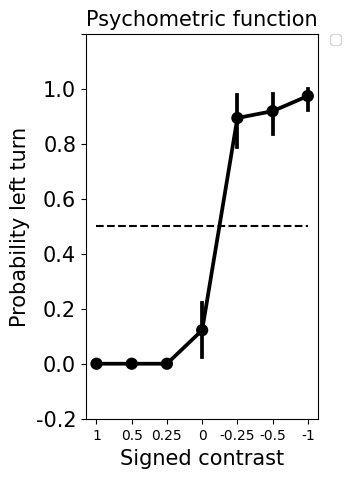

In [12]:
import seaborn as sns
dtp = trialInfoDF
x ='signedContrast'
y = 'LeftTurn'
hue= 'mouse'
minTrial = 30
maxTrial = 1000

fig,ax = plt.subplots(1,1,figsize = (3,5))
order = [1,0.5,0.25,0,-0.25,-0.5,-1]
#ax = sns.pointplot(data = data,x=x,y=y,hue=hue,palette= palette,order = order,alpha = 0.5,aspect = 1.5,dodge=0.2)
ax = sns.pointplot(data = dtp,x=x,y=y,color='black',order = order)
#ax = sns.pointplot(data = data,x=x,y=y)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_title('Psychometric function',fontsize = 15)
ax.set_xlabel('Signed contrast',fontsize = 15)
ax.set_ylabel('Probability left turn',fontsize = 15)
ax.set_ylim(-0.2,1.2)
#ax.set_xticklabels([-45,45],fontsize = 15)
ax.set_yticklabels(labels =np.round(np.arange(-0.2,1.2,0.2),2),fontsize = 15)
ax.axes.hlines(0.5,0,6,linestyles='dashed',color='black')
# ax.axes.hlines(0.70,0,data[x].max()-data[x].min(),linestyles='dashed',color='black')
plt.show()

In [14]:
D=dict()
D['y']= trialInfoDF.LeftTurn.values+1
D['y']

array([2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2,
       1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2,
       1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1,
       2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1,
       1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 2,
       1, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1,
       1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1,

In [49]:
varstoadd = ['stim_angle','stim_contrast']
outputs = []
for name in varstoadd:
    currenttrial = trialInfoDF[name].values
    prevtrial = np.insert(trialInfoDF[name].values[:-1],0,trialInfoDF[name].values[0])
    assert len(currenttrial) == len(prevtrial)
    both = np.stack([currenttrial,prevtrial]).T
    outputs.append(both)

In [50]:
D['inputs'] =dict()
for idx,name in enumerate(varstoadd):
    D['inputs'][name]= outputs[idx]

In [ ]:
D['dayLength'][0] = len(data)